# Multi-digit recognition of Chrome dinosaur score using the Keras functional API

In [1]:
import tensorflow as tf
import keras
#from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras.models import Model
from keras.layers import *
import os
import matplotlib.pyplot as plt
import sys
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Preparation

In [2]:
base_dir = "C:/Users/bened/OneDrive/Arbeit/Lernen/python_training/score_pics/"
train_dir = base_dir + "train_pics/"
validation_dir = base_dir + "validation_pics/"
test_dir = base_dir + "test_pics/"

In [3]:
print("total training images:", len(os.listdir(train_dir)))
print("total validation images:", len(os.listdir(validation_dir)))
print("total test images:", len(os.listdir(test_dir)))



total training images: 29
total validation images: 13
total test images: 15


In [293]:
train_folder = base_dir + "train_pics"
valid_folder = base_dir + "validation_pics"
test_folder = base_dir + "test_pics"

In [294]:
train_names = [f for f in os.listdir(train_folder)]
valid_names = [f for f in os.listdir(valid_folder)]
test_names = [f for f in os.listdir(test_folder)]

In [295]:
print(str(len(train_names)) + " training files")
print(str(len(valid_names)) + " validation files")
print(str(len(test_names)) + " test files")

132 training files
58 validation files
44 test files


## Create input, labels

In [296]:
def create_dataset(fold, names):
    dataset = np.ndarray(shape=(len(names), 50, 160, 3), dtype = np.float32)
    i = 0
    for f in names:
        img = load_img(base_dir + fold + "/" + f)
        x = img_to_array(img)
        #x = x.reshape(())
        x = (x - 128) / 128
        dataset[i] = x
        i += 1
    dataset = dataset[:,:,:,0]
    dataset = np.expand_dims(dataset, axis = 3)
    return dataset


def create_labels(names):
    labels = [np.zeros((len(names),10)) for i in range(5)]
    i = 0
    for n in range(len(names)):
        seq = names[n][0:5]
        for digit in range(len(seq)):
            label = int(seq[digit])
            #print(str(digit) + ";" + str(label) + ";" + str(n))
            labels[digit][n][label] = 1
        i += 1
    return labels

In [298]:
train_dataset = create_dataset("train_pics", train_names)
validation_dataset = create_dataset("validation_pics", valid_names)
test_dataset = create_dataset("test_pics", test_names)

train_labels = create_labels(train_names)
validation_labels = create_labels(valid_names)
test_labels = create_labels(test_names)

In [300]:
train_dataset.shape

(132, 50, 160, 1)

In [301]:
train_labels[1][1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Define model

In [302]:
#Filters:
f1, f2, f3 = 8,16,32
patch_size = 5
k_size = (3,3)
p_size = (4,4)
n_class = 10
node = 10

inp_corr = Input(shape=(50,160,1))

conv1 = Conv2D(filters = f1, kernel_size = k_size, activation = "relu")(inp_corr)
#maxp1 = MaxPool2D(pool_size = p_size)(conv1)

#conv2 = Conv2D(filters = f2, kernel_size = k_size, activation = "relu")(maxp1)
#maxp2 = MaxPool2D(pool_size = p_size)(conv2)

#conv3 = Conv2D(filters = f3, kernel_size = k_size, activation = "relu")(maxp2)
#maxp3 = MaxPool2D(pool_size = p_size)(conv3)

flat = Flatten()(conv1)
#drop = Dropout(0.1)(flat)

#dense_11 = Dense(node, activation = "relu")(drop)
#dense_12 = Dense(node, activation = "relu")(drop)
#dense_13 = Dense(node, activation = "relu")(drop)
#dense_14 = Dense(node, activation = "relu")(drop)
#dense_15 = Dense(node, activation = "relu")(drop)

#dense_21 = Dense(n_class, activation = "softmax")(dense_11)
#dense_22 = Dense(n_class, activation = "softmax")(dense_12)
#dense_23 = Dense(n_class, activation = "softmax")(dense_13)
#dense_24 = Dense(n_class, activation = "softmax")(dense_14)
#dense_25 = Dense(n_class, activation = "softmax")(dense_15)

#Alternative:
dense_21 = Dense(n_class, activation = "softmax")(flat)
dense_22 = Dense(n_class, activation = "softmax")(flat)
dense_23 = Dense(n_class, activation = "softmax")(flat)
dense_24 = Dense(n_class, activation = "softmax")(flat)
dense_25 = Dense(n_class, activation = "softmax")(flat)

output = [dense_21, dense_22, dense_23, dense_24, dense_25]

#output = [dense_11, dense_12, dense_13, dense_14, dense_15]


model = Model(input = inp_corr, output = output)
model.compile(loss = "categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=[<tf.Tenso...)`


In [303]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_44 (InputLayer)           (None, 50, 160, 1)   0                                            
__________________________________________________________________________________________________
conv2d_46 (Conv2D)              (None, 48, 158, 8)   80          input_44[0][0]                   
__________________________________________________________________________________________________
flatten_25 (Flatten)            (None, 60672)        0           conv2d_46[0][0]                  
__________________________________________________________________________________________________
dense_216 (Dense)               (None, 10)           606730      flatten_25[0][0]                 
__________________________________________________________________________________________________
dense_217 

In [304]:
model.fit(train_dataset, train_labels,nb_epoch = 40, batch_size=50)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/40
132/132 [==============================] - 4s 32ms/step - loss: 9.5388 - dense_216_loss: 0.8305 - dense_217_loss: 1.0131 - dense_218_loss: 2.4760 - dense_219_loss: 2.5887 - dense_220_loss: 2.6305 - dense_216_acc: 0.6288 - dense_217_acc: 0.6212 - dense_218_acc: 0.1288 - dense_219_acc: 0.1818 - dense_220_acc: 0.1212
Epoch 2/40
132/132 [==============================] - 0s 3ms/step - loss: 7.1411 - dense_216_loss: 0.4044 - dense_217_loss: 0.3631 - dense_218_loss: 1.9936 - dense_219_loss: 2.2052 - dense_220_loss: 2.1749 - dense_216_acc: 1.0000 - dense_217_acc: 1.0000 - dense_218_acc: 0.3182 - dense_219_acc: 0.3333 - dense_220_acc: 0.3409
Epoch 3/40
132/132 [==============================] - 0s 3ms/step - loss: 5.7437 - dense_216_loss: 0.0303 - dense_217_loss: 0.0285 - dense_218_loss: 1.6647 - dense_219_loss: 2.0104 - dense_220_loss: 2.0099 - dense_216_acc: 1.0000 - dense_217_acc: 1.0000 - dense_218_acc: 0.3939 - dense_219_acc: 0.3712 - dense_220_acc: 0.4545
Epoch 4/40
132/132 [=

132/132 [==============================] - 0s 3ms/step - loss: 0.1675 - dense_216_loss: 1.1921e-07 - dense_217_loss: 1.1921e-07 - dense_218_loss: 0.0305 - dense_219_loss: 0.0560 - dense_220_loss: 0.0810 - dense_216_acc: 1.0000 - dense_217_acc: 1.0000 - dense_218_acc: 1.0000 - dense_219_acc: 1.0000 - dense_220_acc: 0.9924
Epoch 26/40
132/132 [==============================] - 0s 3ms/step - loss: 0.1580 - dense_216_loss: 1.1921e-07 - dense_217_loss: 1.1921e-07 - dense_218_loss: 0.0283 - dense_219_loss: 0.0516 - dense_220_loss: 0.0781 - dense_216_acc: 1.0000 - dense_217_acc: 1.0000 - dense_218_acc: 1.0000 - dense_219_acc: 1.0000 - dense_220_acc: 0.9924
Epoch 27/40
132/132 [==============================] - 0s 3ms/step - loss: 0.1423 - dense_216_loss: 1.1921e-07 - dense_217_loss: 1.1921e-07 - dense_218_loss: 0.0265 - dense_219_loss: 0.0475 - dense_220_loss: 0.0684 - dense_216_acc: 1.0000 - dense_217_acc: 1.0000 - dense_218_acc: 1.0000 - dense_219_acc: 1.0000 - dense_220_acc: 0.9924
Epoch 2

## Evaluate model

In [305]:
def get_result(result):
    resultstr = ''
    for i in range(5):
        resultstr += str(np.argmax(result[i]))
    return resultstr

In [308]:
%matplotlib inline
print("Prediction   Original file name  Correct\n\n")
for i in range(44):
    y_pred = model.predict(test_dataset[i].reshape(1, 50, 160, 1))
    real = test_names[i][0:5]
    comp = (real == get_result(y_pred))
    print(get_result(y_pred) + "          " + str(test_names[i]) + "      " + str(comp))

Prediction   Original file name  Correct


00003          00003.png      True
00004          00004.png      True
00012          00012.png      True
00013          00013.png      True
00014          00014.png      True
00020          00020.png      True
00022          00022.png      True
00023          00023.png      True
00030          00030.png      True
00031          00031.png      True
00032          00032.png      True
00039          00039.png      True
00041          00041.png      True
00042          00042.png      True
00043          00043.png      True
00046          00046.png      True
00049          00049.png      True
00050          00050.png      True
00052          00052.png      True
00059          00059.png      True
00060          00060.png      True
00061          00061.png      True
00068          00068.png      True
00070          00070.png      True
00071          00071.png      True
00078          00078.png      True
00080          00080.png      True
00081       

'00003'

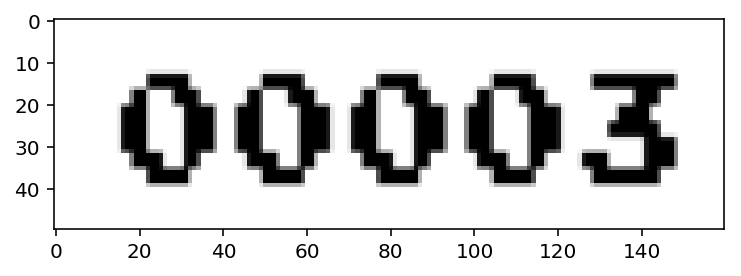

In [309]:
%matplotlib inline
plt.imshow(test_dataset[0,:,:,0], cmap = "gray")
get_result(model.predict(test_dataset[0].reshape(1, 50, 160, 1)))

Todo:
Overfitting?